<a href="https://colab.research.google.com/github/shsk000/colab/blob/master/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [3]:
data = load_breast_cancer()

In [4]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
X = df.loc[:, :]

In [8]:
X.shape

(569, 30)

In [9]:
y = pd.DataFrame(data.target)
y = y.values.ravel()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

import numpy as np

In [14]:
np.linspace(0.1, 1.0, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [15]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=1)

In [16]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.98765432, 0.98765432, 0.98765432, 0.98765432, 0.98765432,
        0.98765432, 0.98765432, 0.98765432, 0.98765432, 0.98765432],
       [0.99180328, 0.99180328, 0.99180328, 0.99180328, 0.99180328,
        0.99180328, 0.99180328, 0.99180328, 0.99180328, 0.99180328],
       [0.99386503, 0.99386503, 0.99386503, 0.99386503, 0.99386503,
        0.99386503, 0.99386503, 0.99386503, 0.99386503, 0.99386503],
       [0.99509804, 0.98529412, 0.99019608, 0.99509804, 0.99509804,
        0.99509804, 0.99509804, 0.99509804, 0.99509804, 0.99509804],
       [0.99183673, 0.98367347, 0.9877551 , 0.98367347, 0.99183673,
        0.97959184, 0.99183673, 0.99183673, 0.99183673, 0.99183673],
       [0.99300699, 0.99300699, 0.98951049, 0.98951049, 0.99300699,
        0.98601399, 0.99300699, 0.98951049, 0.98951049, 0.98951049],
       [0.99388379, 0.98470948, 0.9908256

In [17]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [18]:
import matplotlib.pyplot as plt

In [19]:
type(train_scores)

numpy.ndarray

In [20]:
train_mean

array([1.        , 0.98765432, 0.99180328, 0.99386503, 0.99362745,
       0.98857143, 0.99055944, 0.9883792 , 0.98641304, 0.98753056])

In [21]:
train_std

array([0.00000000e+00, 2.22044605e-16, 1.11022302e-16, 2.22044605e-16,
       3.13878639e-03, 4.39605290e-03, 2.23885463e-03, 2.66599324e-03,
       2.43050867e-03, 2.30659685e-03])

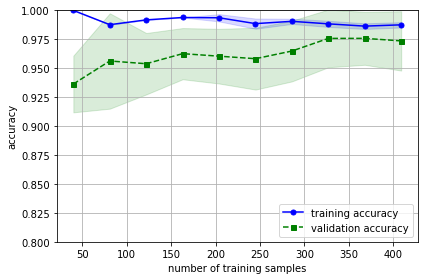

In [22]:
plt.plot(train_sizes, train_mean, color="blue", marker="o", markersize=5, label="training accuracy")
plt.fill_between(
    train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color="blue"
)
plt.plot(train_sizes, test_mean, color="green", linestyle="--", marker="s", markersize=5, label="validation accuracy")
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color="green")

plt.grid()
plt.xlabel("number of training samples")
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

In [23]:
test_std

array([0.02449333, 0.04122347, 0.02654474, 0.02212666, 0.02363445,
       0.02669553, 0.02624398, 0.02492346, 0.02286101, 0.02563684])

In [24]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10
)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [25]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

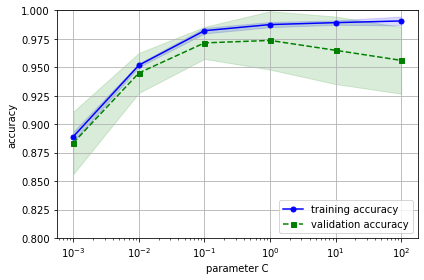

In [26]:
plt.plot(
    param_range,
    train_mean,
    color="blue",
    marker="o",
    markersize=5,
    label="training accuracy")
plt.fill_between(
    param_range,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color="blue")
plt.plot(
    param_range,
    test_mean,
    color="green",
    linestyle="--",
    marker="s",
    markersize=5,
    label="validation accuracy")
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color="green")

plt.grid()
plt.xscale("log")
plt.legend(loc="lower right")
plt.xlabel("parameter C")
plt.ylabel("accuracy")
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()
